In [65]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from k_means import KMeans as KMeansMy
from k_medoids import KMedoids as KMedoidsMy
from dbscan import DBSCAN as DBSCANMy

# Generate datasets
X_blobs, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=1)
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=1)


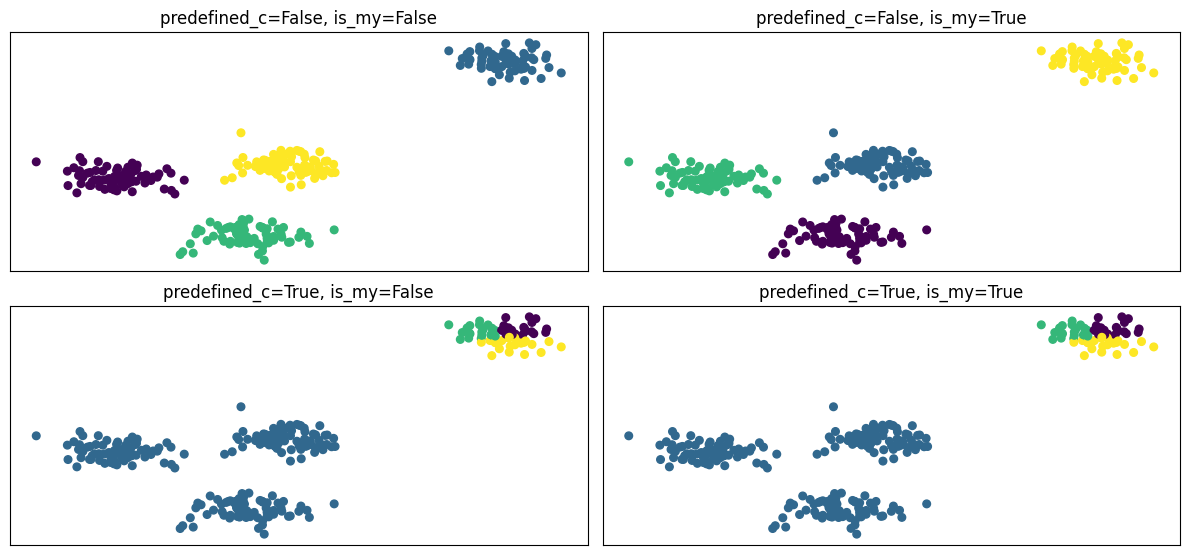

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

for row_idx, predefined_c in enumerate([False, True]):
    for col_idx, is_my in enumerate([False, True]):
        if predefined_c:
            c = [X_blobs[0], X_blobs[1], X_blobs[2], X_blobs[3]]
        elif is_my:
            c = None
        else:
            c = 'k-means++'
        if is_my:
            model = KMeansMy(n_clusters=4, centroids=c)
        else:
            model = KMeans(n_clusters=4, init=c)
        y_pred = model.fit_predict(X_blobs)
        ax = axes[row_idx, col_idx]
        ax.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred, cmap="viridis", s=30)
        ax.set_title(f"predefined_c={predefined_c}, is_my={is_my}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

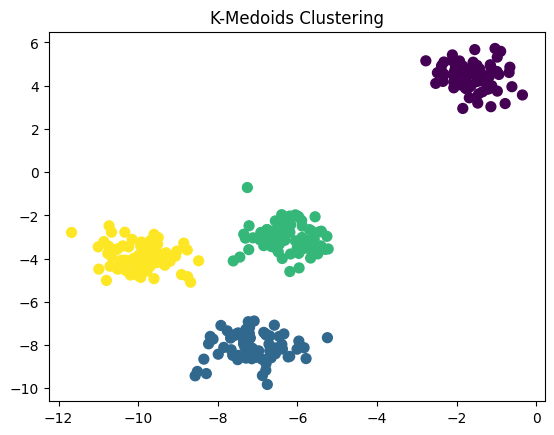

In [67]:
kmedoids = KMedoidsMy(n_clusters=4)
labels = kmedoids.fit_predict(X_blobs)

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, s=50, cmap='viridis')
plt.title("K-Medoids Clustering")
plt.show()

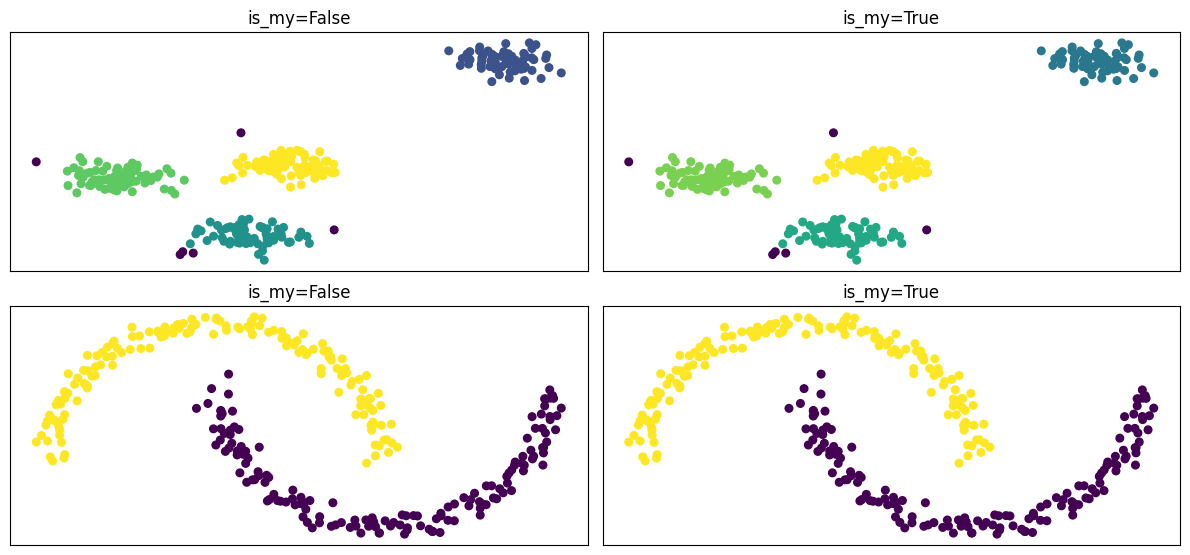

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

for row_idx, X in enumerate([X_blobs, X_moons]):
    for col_idx, is_my in enumerate([False, True]):
        if is_my:
            model = DBSCANMy(eps=0.2 + 0.5 * (1 - row_idx))
        else:
            model = DBSCAN(eps=0.2 + 0.5 * (1 - row_idx))
        y_pred = model.fit_predict(X)
        ax = axes[row_idx, col_idx]
        ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis", s=30)
        ax.set_title(f"is_my={is_my}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

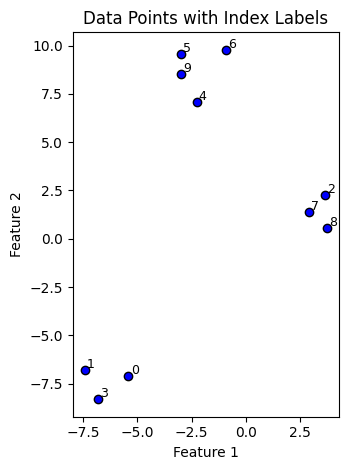

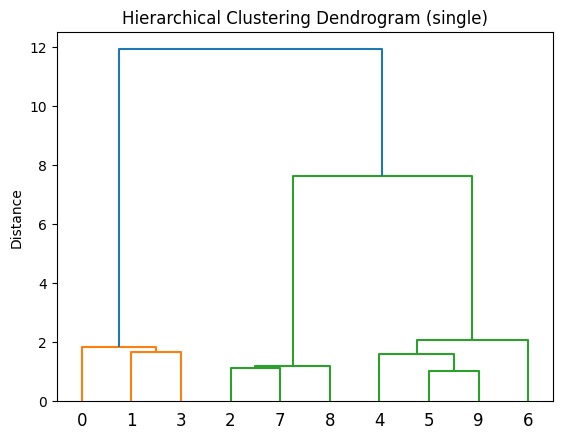

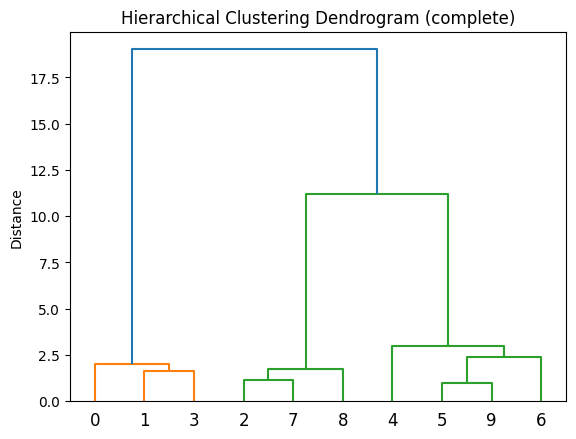

In [79]:
from hierarchical import HierarchicalClustering
from scipy.cluster.hierarchy import dendrogram

X, _ = make_blobs(n_samples=10, centers=3, random_state=42)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k')
for i, (x, y) in enumerate(X):
    plt.text(x + 0.1, y + 0.1, str(i), fontsize=9)
plt.title("Data Points with Index Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


for l in ['single', 'complete']:
    hc = HierarchicalClustering(linkage=l)
    Z = hc.fit(X)
    # print(Z)

    dendrogram(Z)
    plt.title(f"Hierarchical Clustering Dendrogram ({l})")
    plt.ylabel("Distance")
    plt.show()
